# TP2 - Linear Correlation


Estimated time: **1.5** hour


In this lab, you'll go over hands-on exercises using Python to further consolidate your understanding about linear correlation, in particular the Pearson's Correlation Coefficient, and the visualization by means of scatterplot, hexagonal binning plot, correlation matrix and heatmap. Besides, you will explore serial correlation in time series using autocorrelation. Last, we will practice the calculation of confidence interval. 

## Objectives


* Get familiar with the dataset
* Sample exercises
  * Correlation: Pearson's Correlation Coefficient (PCC), scatterplot, hexagonal binning plot, correlation matrix, and heatmap
  * Autocorrelation & Partial autocorrelation
  * Confidence interval
* Assignment questions

----


# Get familiar with the data set

### Import Libraries


All libraries required for this lab are listed below. If you don't have those libraries installed on your machine, you may need to uncomment and install certain libraries.


In [1]:
# !pip install numpy pandas seaborn==0.13 matplotlib

Import the libraries needed for the lab


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Read in the csv file


In [4]:
# Load the dataset
df = pd.read_csv('university_ranking.csv',encoding='latin-1')  

### Data Description
#### The dataset contains the Times Higher Education World University Rankings 2016-2024, which include more than 1,900 universities across more than 100 countries and regions. The individual field of the dataset is explained below and more information can be found at https://www.timeshighereducation.com/sites/default/files/the_2024_world_university_rankings_methodology.pdf

| Column Name               | Description                                                                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|
| **Rank**                   | The ranking of the university based on the Overall Score.                                |
| **Name**                   | The name of the university.                                                                                                                |
| **Country**                | The country where the university is located.                                                                                               |
| **Student Population**      | The number of full-time-equivalent students at the university in a certain year.                                                                                  |
| **Students to Staff Ratio** | The ratio of full-time-equivalent students to the number of academic staff, those involved in teaching or research.                              |
| **International Students**  | The percentage of students originating from outside the country of the university.                                                             |
| **Female to Male Ratio**    | The ratio of female to male students at the university.                                                      |
| **Overall Score**           | A composite score representing the overall performance of the university computed based on various performance indicators.                   |
| **Teaching**                | A score representing the university's teaching, which may include factors like teaching reputation, student staff ratio, doctorate bachelor ratio, doctorate staff ratio           |
| **Research Environment**    | A score representing the univiersity's research environment, which may include factors like reserach reputation, research income, research productivity.                           |
| **Research Quality**        | A score representing the university's research quality, which may include factors like citation impact, research strength, research excellence, and research influence.       |
| **Industry Impact**         | A score representing the university’s industry impact,  which may include factors like industry income, patents                    |
| **International Outlook**   | A score representing the university's global outlook, which may include factors like  international students, international staff, international co-authorship, etc.                   |
| **Year**                    | The year of the data.                                                                                |


### Display the dataset


In [5]:
df

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year
0,1.0,California Institute of Technology,United States,2243,6.9,26%,33 : 67,95.2000,95.6,97.6,99.8,97.8,64.0,2016
1,2.0,University of Oxford,United Kingdom,19920,11.6,34%,46:54:00,94.2000,86.5,98.9,98.8,73.1,94.4,2016
2,3.0,Stanford University,United States,15596,7.8,22%,42:58:00,93.9000,92.5,96.2,99.9,63.3,76.3,2016
3,4.0,University of Cambridge,United Kingdom,18810,11.8,34%,46:54:00,92.8000,88.2,96.7,97.0,55.0,91.5,2016
4,5.0,Massachusetts Institute of Technology,United States,11074,9.0,33%,37 : 63,92.0000,89.4,88.6,99.7,95.4,84.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12425,1900.0,Penza State University,Russian Federation,17934,17.2,12%,56:44:00,12.1935,14.3,8.7,7.8,16.3,32.8,2024
12426,1901.0,Universidad Peruana de Ciencias Aplicadas (UPC),Peru,56595,21.1,1%,50:50:00,12.1470,13.5,8.7,10.1,15.6,26.5,2024
12427,1902.0,Universidade Federal Rural do Semi-Arido,Brazil,8687,12.4,0%,49:51:00,11.9910,19.1,9.0,5.7,16.6,18.3,2024
12428,1903.0,State University of Bahia,Brazil,25067,11.9,0%,66:34:00,11.5655,19.3,8.6,4.1,16.2,20.0,2024


#### Get info about the dataset 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12430 entries, 0 to 12429
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     12430 non-null  float64
 1   Name                     12430 non-null  object 
 2   Country                  12430 non-null  object 
 3   Student Population       12430 non-null  int64  
 4   Students to Staff Ratio  12430 non-null  float64
 5   International Students   12430 non-null  object 
 6   Female to Male Ratio     11839 non-null  object 
 7   Overall Score            12430 non-null  float64
 8   Teaching                 12430 non-null  float64
 9   Research Environment     12430 non-null  float64
 10  Research Quality         12430 non-null  float64
 11  Industry Impact          12430 non-null  float64
 12  International Outlook    12430 non-null  float64
 13  Year                     12430 non-null  int64  
dtypes: float64(8), int64(2

#### Get the data related to University of Luxembourg

In [7]:
uniLU = df[df['Name']=='University of Luxembourg'].set_index('Year')
uniLU

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
Year,,,,,,,,,,,,,
2016,193.0,University of Luxembourg,Luxembourg,5144,15.9,52%,50:50:00,49.4000,25.0,26.7,84.8,38.1,99.8
2017,179.0,University of Luxembourg,Luxembourg,5219,17.2,55%,51:49:00,52.1575,29.7,30.0,85.8,40.6,99.9
2018,179.0,University of Luxembourg,Luxembourg,4969,14.6,57%,50:50:00,53.8050,26.8,32.4,91.9,39.6,99.8
2019,205.0,University of Luxembourg,Luxembourg,4969,16.5,57%,50:50:00,52.8875,29.5,30.6,87.7,42.8,99.7
2020,203.0,University of Luxembourg,Luxembourg,4654,18.7,49%,51:49:00,53.6675,37.9,36.5,75.8,45.2,99.7
2021,224.0,University of Luxembourg,Luxembourg,4858,19.0,51%,52:48:00,51.7700,35.7,35.0,73.2,45.2,99.6
2022,261.0,University of Luxembourg,Luxembourg,4890,19.1,52%,53:47:00,50.0150,33.0,39.2,65.7,47.3,99.5
2023,244.0,University of Luxembourg,Luxembourg,5185,19.3,51%,53:47:00,51.4850,38.2,39.8,64.5,51.2,99.4
2024,243.0,University of Luxembourg,Luxembourg,5599,21.3,49%,53:47:00,56.0480,39.6,39.4,78.1,63.0,93.2


#### Get the data related to Oxford University

In [8]:
oxford = df[df['Name']=='University of Oxford'].set_index('Year')
oxford

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook
Year,,,,,,,,,,,,,
2016,2.0,University of Oxford,United Kingdom,19920,11.6,34%,46:54:00,94.2000,86.5,98.9,98.8,73.1,94.4
2017,1.0,University of Oxford,United Kingdom,19720,10.9,35%,46:54:00,95.0200,89.6,99.1,99.2,62.5,94.5
2018,1.0,University of Oxford,United Kingdom,20410,11.2,38%,46:54:00,94.3075,86.7,99.5,99.1,63.7,95.0
2019,1.0,University of Oxford,United Kingdom,20300,11.0,40%,46:54:00,96.0175,91.8,99.5,99.1,67.0,96.3
2020,1.0,University of Oxford,United Kingdom,20665,11.2,41%,46:54:00,95.4175,90.5,99.6,98.4,65.5,96.4
2021,1.0,University of Oxford,United Kingdom,20775,11.1,41%,46:54:00,95.6175,91.3,99.6,98.0,68.7,96.4
2022,1.0,University of Oxford,United Kingdom,20835,10.7,42%,47:53:00,95.6625,91.0,99.6,98.0,74.4,96.3
2023,1.0,University of Oxford,United Kingdom,20965,10.6,42%,48:52:00,96.3875,92.3,99.7,99.0,74.9,96.2
2024,1.0,University of Oxford,United Kingdom,21750,10.9,42%,49:51:00,98.4575,96.6,100.0,99.0,98.7,97.5


#### The "International Students" column contains percentage value which is represented as a string, convert it to decimal value to prepare for the following exercise

In [9]:
# Check if the 'International Students' column contains a '%' symbol
if df['International Students'].str.contains('%').any():
    # If it contains '%', strip the '%' and convert to numeric
    df['International Students'] = pd.to_numeric(df['International Students'].str.rstrip('%'), errors='coerce') / 100.0

df.head()

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year
0,1.0,California Institute of Technology,United States,2243,6.9,0.26,33 : 67,95.2,95.6,97.6,99.8,97.8,64.0,2016
1,2.0,University of Oxford,United Kingdom,19920,11.6,0.34,46:54:00,94.2,86.5,98.9,98.8,73.1,94.4,2016
2,3.0,Stanford University,United States,15596,7.8,0.22,42:58:00,93.9,92.5,96.2,99.9,63.3,76.3,2016
3,4.0,University of Cambridge,United Kingdom,18810,11.8,0.34,46:54:00,92.8,88.2,96.7,97.0,55.0,91.5,2016
4,5.0,Massachusetts Institute of Technology,United States,11074,9.0,0.33,37 : 63,92.0,89.4,88.6,99.7,95.4,84.0,2016


## Sample exercise

### Example-1: compute the Pearson's Correlation Coefficient (PCC) between Overall Score and Teaching using the formula

The **Pearson's Correlation Coefficient** is calculated as:

$$
\textcolor{blue}{\Large r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}}
$$

where <br>
- $\text{Cov(X,Y)}$ is the covariance between $X$ and $Y$ <br>
- $\sigma_X$ is the standard deviation of $X$ <br>
- $\sigma_Y$ is the standard deviation of $Y$ <br>

More specifically, 
$$ 
\large
\begin{align*}
\text{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) \\ \\
\text{Variance(X)} \quad = \quad \frac{\sum_{i=1}^{n} (X_i - \bar{X})^2}{n}  \\ \\
\text{Standard deviation}  \quad \sigma_X \quad = \quad \sqrt{\text{Variance(X)}} \\ \\
\end{align*}
$$

Hence, 
$$
\Large r = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n} (X_i - \bar{X})^2} \sqrt{\sum_{i=1}^{n} (Y_i - \bar{Y})^2}}
$$



In [10]:
# Compute covariance between 'Overall Score' and 'Teaching'
covariance = df['Overall Score'].cov(df['Teaching'])

# Compute standard deviation of 'Overall Score'
std_overall_score = df['Overall Score'].std()

# Compute standard deviation of 'Teaching'
std_teaching = df['Teaching'].std()

# Compute the Pearson's Correlation Coefficient (PCC) using covariance and standard deviations
correlation_coefficient = covariance / (std_overall_score * std_teaching)

# Output the results
print(f"Covariance between Overall Score and Teaching: {covariance}")
print(f"Standard deviation of Overall Score: {std_overall_score}")
print(f"Standard deviation of Teaching: {std_teaching}")
print(f"Pearson's Correlation Coefficient (calculated manually): {correlation_coefficient}")

Covariance between Overall Score and Teaching: 199.3199040299274
Standard deviation of Overall Score: 16.883560628362147
Standard deviation of Teaching: 14.061390594669898
Pearson's Correlation Coefficient (calculated manually): 0.8395727911304897


### Example-2: compute the Pearson's Correlation Coefficient (PCC) between Overall Score and Teaching using the built-in corr() function

In [11]:
# Compute the Pearson's Correlation Coefficient (PCC) between 'Overall Score' and 'Teaching'
correlation = df['Overall Score'].corr(df['Teaching'])

# Output the result
print(f"Correlation coefficient between Overall Score and Teaching is: {correlation}")

Correlation coefficient between Overall Score and Teaching is: 0.8395727911304895


### Example-3: use scatterplot and the hexagonal binning plot to visualize the correlation between Overall Score and Teaching

#### Scatterplot is commonly used to conduct visual exploration of possible correlation between variables. With respect to scatterplot, the hexagonal binning plot comes handy for large datasets, as it can differentiate the density of data points in each hexagon by means of color density.

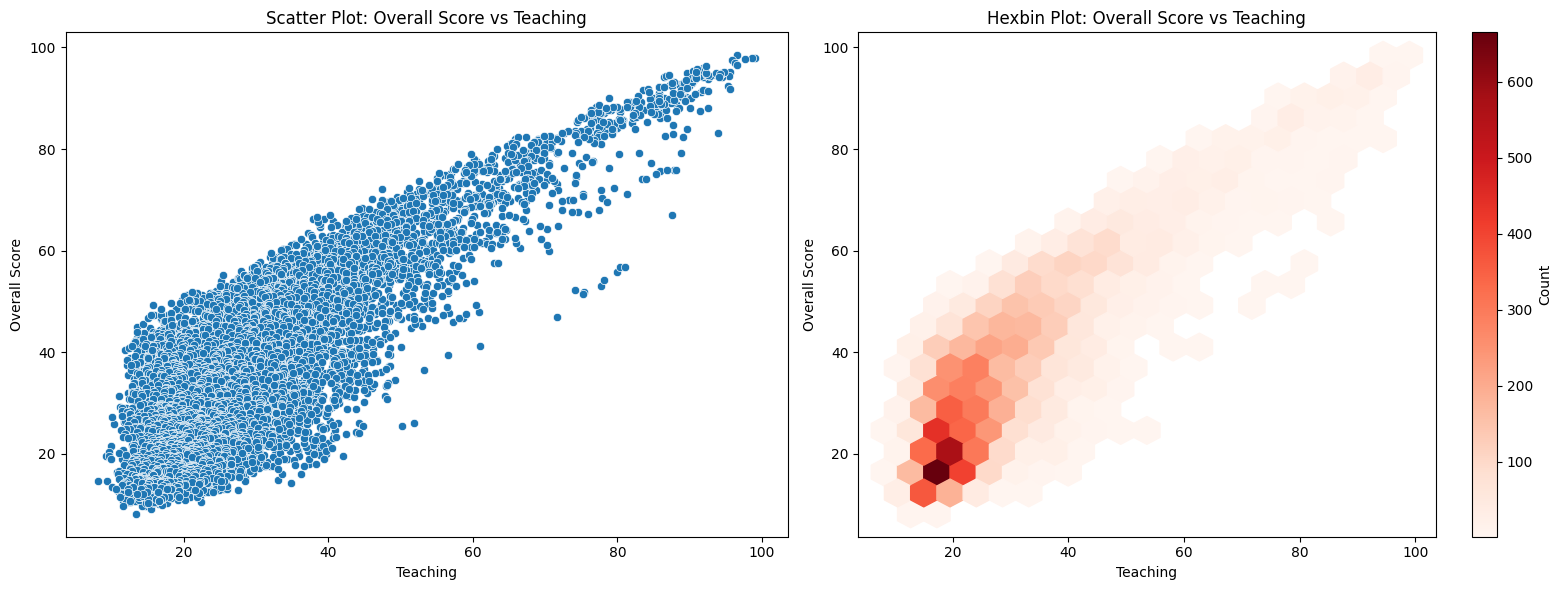

In [12]:
# Set up the figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Generate scatter plot using Seaborn
sns.scatterplot(x='Teaching', y='Overall Score', data=df, ax=ax1)
ax1.set_title('Scatter Plot: Overall Score vs Teaching')
ax1.set_xlabel('Teaching')
ax1.set_ylabel('Overall Score')

# Generate the hexagonal binning plot using Matplotlib hexbin() function: 
# - gridsize specifies the number of hexagons across the x-axis
# - cmap indicates the color map to be used for the hexagons. 'Reds' means the hexagons will be 
#   shaded using a red gradient where darker shades represent higher densities of points.
# - mincnt=1 ensures that hexagons with at least 1 point will be colored. If a hexagon has fewer 
#   points than the specified threshold, it will not be shown.
hb = ax2.hexbin(x='Teaching', y='Overall Score', data=df, gridsize=20, cmap='Reds', mincnt=1)
ax2.set_title('Hexbin Plot: Overall Score vs Teaching')
ax2.set_xlabel('Teaching')
ax2.set_ylabel('Overall Score')
# Add a color bar to the plot, providing a legend for the hexbin counts
fig.colorbar(hb, ax=ax2, label='Count')

# Show both plots
plt.tight_layout()
plt.show()

#### Observation:
- According to the scatterplot on the left, we can see that as the value of Teaching increases, the value of the Overall Score also tends to increase, which indicates a positive correlation between them. The Pearson's Correlation Coefficient (PCC) computed before gives a more precise idea of the correlation between the two.
- As shown on the right figure, the hexagons in darker red indicates that there are more universities have an Overall Score around 20 with a Teaching score around 20. 

#### Generate the scatter plot with the linear regression line using the linear regression model from scipy.stats

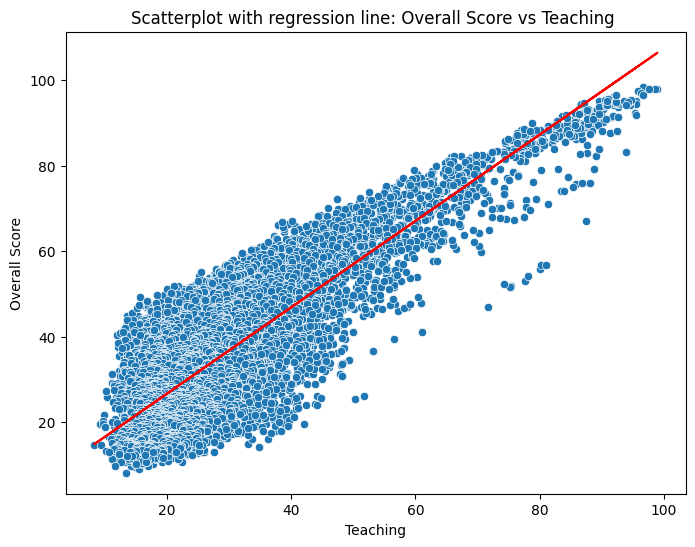

In [13]:
from scipy.stats import linregress

# Perform linear regression between 'Teaching' and 'Overall Score'
# The result includes slope, intercept, r-value, p-value, and standard error.
# Here, we only make use of the slope and intercept to show the liner regression line
result = linregress(df['Teaching'], df['Overall Score'])
predict_overall_score = result.slope * df['Teaching'] + result.intercept

# Display the linear regression line over the scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Teaching', y='Overall Score', data=df)
plt.plot(df['Teaching'], predict_overall_score, color='red')

plt.title('Scatterplot with regression line: Overall Score vs Teaching ')
plt.xlabel('Teaching')
plt.ylabel('Overall Score')
plt.show()

#### Or we can generate the scatter plot with the linear regression line directly using the Seaborn's regplot() function.

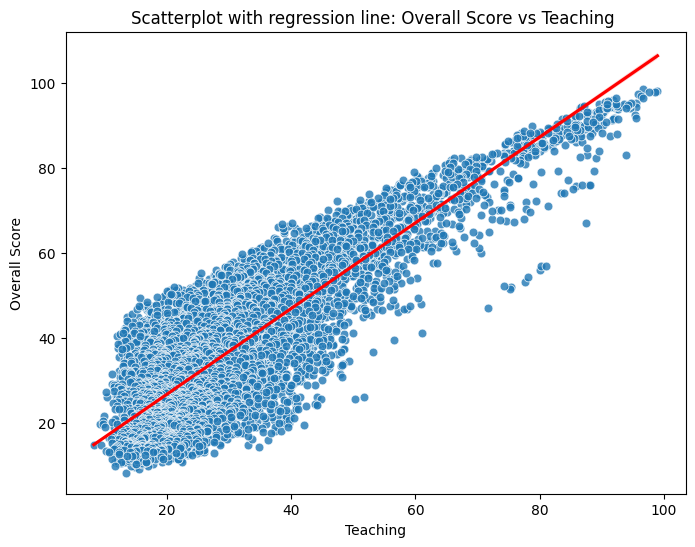

In [14]:
# Generate the scatter plot with regression line using Seaborn's regplot() function
plt.figure(figsize=(8, 6))
# The regplot() function plots data points as scatter plot and fits a regression line over them.
# - line_kws parameter customizes the appearance of the regression line. 
# - scatter_kws customizes the appearance of the scatter points. Here the point size is set to 40, 
#   the edge color of the scatter point is set to white, and the thickness of the edge is adjusted 
#   to 0.6 to mimic the same point style as in the above plot.
sns.regplot(x='Teaching', y='Overall Score', data=df, line_kws={'color': 'red'}, scatter_kws={'s': 40, 'edgecolor': 'w', 'linewidths': 0.6})  
plt.title('Scatterplot with regression line: Overall Score vs Teaching ')
plt.xlabel('Teaching')
plt.ylabel('Overall Score')
plt.show()

### Example-4: Pearson's Correlation Coefficient - understand the principle behind normalizing the covariance

$$ 
\large
\begin{align*}
\text{Variance(X)} \quad = \quad \frac{\sum_{i=1}^{n} (X_i - \bar{X})^2}{n}  \\ \\
\text{Standard deviation}  \quad \sigma_X \quad = \quad \sqrt{\text{Variance(X)}} \\ \\
\text{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) \\ \\
\Large r = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y}
\end{align*}
$$

#### Compute the covariance between International Outlook and the percentage of International Students.

In [15]:
# Build a new data frame which contains only the International Students and International Outlook columns
new_df_1 = df[['International Students', 'International Outlook']].copy()
new_df_1

,International Students,International Outlook
0,0.26,64.0
1,0.34,94.4
2,0.22,76.3
3,0.34,91.5
4,0.33,84.0
...,...,...
12425,0.12,32.8
12426,0.01,26.5
12427,0.00,18.3
12428,0.00,20.0


In [16]:
# Compute the covariance between the two columns
covariance_1 = new_df_1['International Outlook'].cov(new_df_1['International Students'])
print(f"Covariance between International Outlook and International Students is: {covariance_1}")

Covariance between International Outlook and International Students is: 2.2052764965355482


#### Instead of representing the percentage of international students as a floating point value between [0.0, 1.0], we are going to represent it as an integer value between [0, 100]. In other words, scale it up by 100.

In [17]:
new_df_2 = df[['International Students', 'International Outlook']].copy()
new_df_2['International Students'] = new_df_2['International Students'] * 100
new_df_2

,International Students,International Outlook
0,26.0,64.0
1,34.0,94.4
2,22.0,76.3
3,34.0,91.5
4,33.0,84.0
...,...,...
12425,12.0,32.8
12426,1.0,26.5
12427,0.0,18.3
12428,0.0,20.0


#### Compute again the covariance between International Outlook and Internation Students

In [18]:
# Compute the covariance between the two columns
covariance_2 = new_df_2['International Outlook'].cov(new_df_2['International Students'])
print(f"Covariance between International Outlook and International Students is: {covariance_2}")

Covariance between International Outlook and International Students is: 220.52764965355502


#### As we can see, the covariance is now 220.5276496535549, instead of 2.2052764965355482. This is because the value of covariance depends on the scale of the variable, as indicated in the lecture slide and the formula $\text{Cov}(X, Y) = \frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})$. The increase in the value of the covariance doesn't mean the international outlook now has a stronger correlation with the percentage of international students, after we change the unit of the variable that we use to represent it.

In [19]:
# Compute the correlation between the two columns
correlation_1 = new_df_1['International Outlook'].corr(new_df_1['International Students'])
correlation_2 = new_df_2['International Outlook'].corr(new_df_2['International Students'])
print(f"Correlation between International Outlook and International Students is: {correlation_1}")
print(f"Correlation between International Outlook and International Students is: {correlation_2}")

Correlation between International Outlook and International Students is: 0.810818191067673
Correlation between International Outlook and International Students is: 0.8108181910676736


#### Instead, if we compute the correlation between the two variables before and after the scale up of the variable of International Students, the correlation remains the same. 

#### As we can see, the Pearson's Correlation Coefficient (PCC) removes the effects of the scale of the variables and normalizes the correlation between two variables to a value within the range of [-1, 1] to make it easier to interpret and compare the strength of the relationship

### Example-5: compute the correlation matrix between International Outlook, Student Population, Students to Staff Ratio, and International Students. And generate the heatmap corresponding to the correlation matrix.

#### Compute the correlation matrix

In [20]:
# Select the relevant columns for correlation computation
correlation_columns = df[['International Outlook', 'Student Population', 'Students to Staff Ratio', 'International Students']]

# Compute the correlation matrix
correlation_matrix = correlation_columns.corr()

# Display the correlation matrix
correlation_matrix

,International Outlook,Student Population,Students to Staff Ratio,International Students
International Outlook,1.000000,-0.047217,0.007265,0.810818
Student Population,-0.047217,1.000000,0.691228,-0.094210
Students to Staff Ratio,0.007265,0.691228,1.000000,-0.033819
International Students,0.810818,-0.094210,-0.033819,1.000000


#### Observations:
- The correlation matrix is symmetric along the diagonal, because PCC(X, Y) = PCC(Y,X)
- The International Outlook has a **Strong** linear correlation (PCC = 0.810818) with the percentage of International Students. Instead, it has **very weak** or almost **no** linear correlation with the Student Population (PCC=-0.047217) and Students to Staff Ratio (PC=0.007265), which do make sense.
- The Student Population has a **Moderate** correlation withe the Students to Staff Ratio (PCC=0.691228). As the Student Population increases, the Students to Staff Ratio also tends to increase. However, this doesn't necessarily increase the percentage of International Students, as their PCC value is -0.094210. This could be because the majority of the students are still local students, or there are other factors (e.g. language barrier) which affects more the precentage of International Students.

#### Generate the heatmap corresponding to the correlation matrix

In [21]:
# To display all the correlation values in the heatmap, seaborn version 0.13 is required
#pip install seaborn==0.13


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


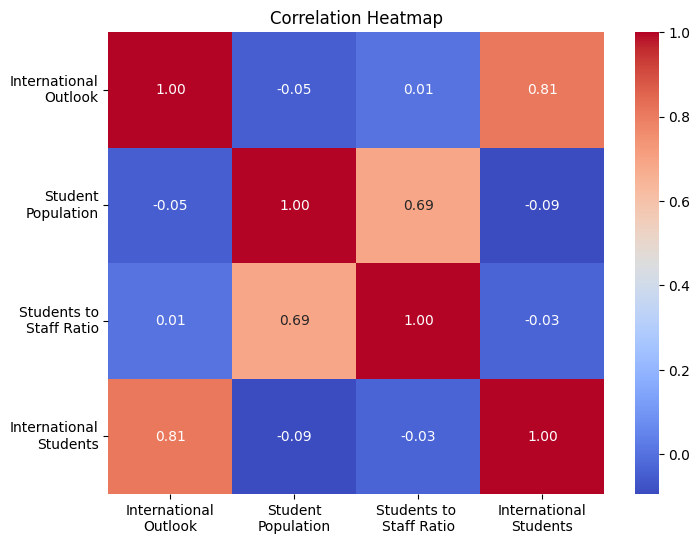

In [22]:
# Generate the heatmap corresponding to the correlation matrix
plt.figure(figsize=(8, 6))

# Use the Seaborn heatmap() function to generate the heatmap 
# corresponding to the correlation matrix.
# - annot=True ensures that each cell of the heatmap are annotated
# - cmap specifies the colormap to be used
# - fmt=.2f specifies the string format used for annotation. 
#           '.2f': two digits after the decimal point.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap')
# Break the xlabels into two lines, and display them in the middle by adjusting 'ticks' and  
# horizontally with rotation=0. The alignment is set to center alignment with ha='center'.  
xlabels = ['International\nOutlook', 'Student\nPopulation', 'Students to \nStaff Ratio', 'International\nStudents']
plt.xticks(ticks=[x + 0.5 for x in range(len(xlabels))], labels=xlabels, rotation=0, ha='center')
# Wrap option is used as a shortcut to wrap the ylabels into 2 lines
plt.yticks(wrap=True)
plt.show()

### Example-6: compute the Confidence Interval with the formula. What is the 95% confidence interval for the average "Teaching" score?

$$
\Large \hat{\mu}_n \pm \eta \frac{s_n}{\sqrt{n}} 
$$

where,
- $\eta$ is a constant that depends on the confidence level $\gamma$
- $s_n$ is the standard deviation of the sample
- $n$ is the size of the sample

####
| Confidence <br> Interval $\gamma$| **$\eta$** |
|---------------------|--------|
| 80%                 | 1.282  |
| 85%                 | 1.440  |
| **90%**                 | **1.645**  |
| **95%**                 | **1.960**  |
| **99%**                 | **2.576**  |
| 99.5%               | 2.807  |
| 99.9%               | 3.291  |

In [23]:
# values for η
eta_values = {
    '80%': 1.282,
    '85%': 1.44,
    '90%': 1.645,
    '95%': 1.96,
    '99%': 2.576,
    '99.5%': 2.807,
    '99.9%': 3.291
}

# compute the 95% Confidence Interval for the mean "Teaching" score
teaching_mean = df['Teaching'].mean() # Sample mean
teaching_std = df['Teaching'].std()  # Sample standard deviation
n = len(df['Teaching'])  # Number of samples

# Use the formula to compute the 95% CI manually
margin_of_error = eta_values["95%"]*teaching_std/np.sqrt(n)
lower_bound = teaching_mean - margin_of_error
upper_bound = teaching_mean + margin_of_error

print(f"95% confidence interval for the average Teaching score is: ({lower_bound}, {upper_bound})")

95% confidence interval for the average Teaching score is: (28.289469170318363, 28.783869526383164)


### Example-7: compute and visualize the 90%, 95%, 99% confidence interval for the average "Teaching" score

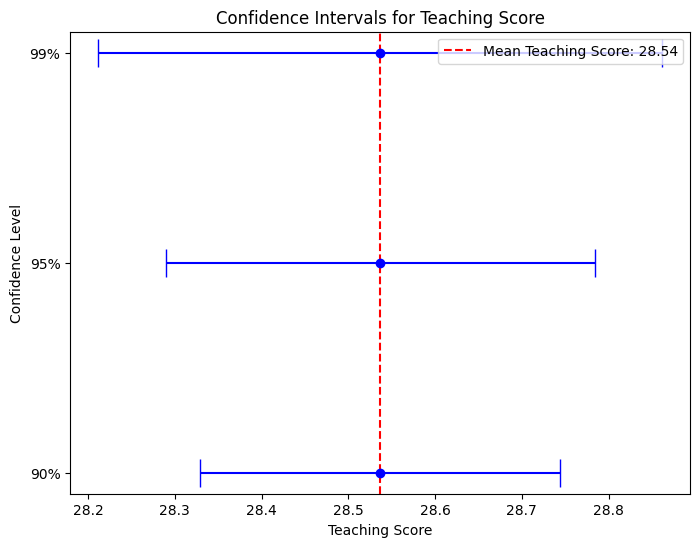

In [24]:
# Calculating the mean and standard error
teaching_mean = df['Teaching'].mean()
teaching_std = df['Teaching'].std()

confidence_levels = ["90%", "95%", "99%"]
confidence_intervals = []

# Calculating confidence intervals for 90%, 95%, and 99%
for cl in confidence_levels:
    margin_of_error = eta_values[cl]*teaching_std/np.sqrt(n)
    lower_bound = teaching_mean - margin_of_error
    upper_bound = teaching_mean + margin_of_error
    confidence_intervals.append((lower_bound, upper_bound))
    

# Plotting the confidence intervals with Teaching Score on the x-axis and Confidence Level on the y-axis
plt.figure(figsize=(8, 6))

plt.errorbar(
    # Creates a list with the same teaching mean value repeated for each confidence level 
    x=[teaching_mean] * len(confidence_intervals), y=['90%', '95%', '99%'],
    # The size of the error bar is the margin of error 
    xerr=[(upper_bound - lower_bound) / 2 for lower_bound, upper_bound in confidence_intervals], 
    # Display the mean as a point (fmt=o), display the markers and error bars in blue (color='b'),  
    # specify the width of the "caps" at the end of the error bars (capsize=10)
    fmt='o', color='b', capsize=10
)

# Adding a vertical line for the mean Teaching score
plt.axvline(x=teaching_mean, color='r', linestyle='--', label=f'Mean Teaching Score: {teaching_mean:.2f}')

# Adding labels and title
plt.title('Confidence Intervals for Teaching Score')
plt.xlabel('Teaching Score')
plt.ylabel('Confidence Level')
plt.legend()

plt.show()

#### The above figure show the confidence intervals computed for the Teaching score for each confidence level (90%, 95%, 99%) horizontally. The mean value for the Teaching score is shown as a point in the middle for the confidence interval, and the lower and upper bound are shown as the cap at the end of the error bars.  

#### Observation: Higher confidence levels will increase the width of the confidence intervals, as indicated in the lecture slide.

### Example-8: compute and visualize the 95% confidence interval for the average "Teaching" score for each year

Years:  [2016 2017 2018 2019 2020 2021 2022 2023 2024]
Means:  [np.float64(31.640124999999998), np.float64(29.971253822629972), np.float64(29.45630099728015), np.float64(28.66796502384738), np.float64(28.221832498210453), np.float64(27.811336828309308), np.float64(27.46052948255114), np.float64(27.01801000555864), np.float64(29.060661764705884)]


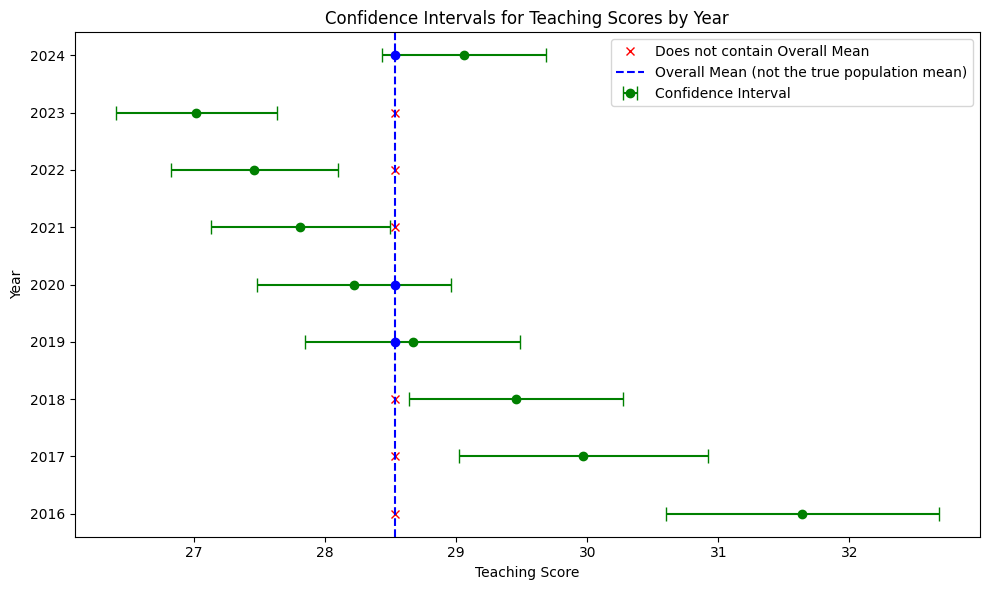

In [25]:
# Compute overall mean for the Teaching score across different years
overall_mean = df['Teaching'].mean()

# Obtain the unique year values
years = df['Year'].unique()
confidence_intervals = []
means = []

# Loop through each year to compute the mean and confidence interval
for year in years:
    annual_data = df[df['Year'] == year]['Teaching']
    teaching_annual_mean = annual_data.mean()
    teaching_annual_std = annual_data.std()
    n = len(annual_data)
    
    # Compute the 95% confidence interval
    margin_of_error = eta_values["95%"] * teaching_annual_std / np.sqrt(n)
    lower_bound = teaching_annual_mean - margin_of_error
    upper_bound = teaching_annual_mean + margin_of_error
    confidence_intervals.append((lower_bound, upper_bound))
    
    means.append(teaching_annual_mean)

print("Years: ", years)
print("Means: ", means)

plt.figure(figsize=(10, 6))

# Plot the confidence intervals for each year
for i, (mean, (lower_bound, upper_bound)) in enumerate(zip(means, confidence_intervals)):
    plt.errorbar(x=mean, y=i, xerr=(upper_bound - lower_bound) / 2,
                 fmt='o', color='green', capsize=5, label='Confidence Interval' if i == 0 else "")

    # Highlight the overall mean and whether it falls within the interval
    if lower_bound <= overall_mean <= upper_bound:
        # If so, plot as a blue point
        plt.plot(overall_mean, i, 'bo')
    else:
        # Else, plot as a red cross
        plt.plot(overall_mean, i, 'rx', label='Does not contain Overall Mean' if i == 0 else "")

# Add vertical line for overall mean
plt.axvline(x=overall_mean, color='blue', linestyle='--', label='Overall Mean (not the true population mean)')

# Set labels and title
plt.yticks(range(len(years)), years)
plt.xlabel('Teaching Score')
plt.ylabel('Year')
plt.title('Confidence Intervals for Teaching Scores by Year')

# Show legend and plot
plt.legend()
plt.tight_layout()
plt.show()


#### Observations:
#### - As we can see, the average Teaching score varies a lot from year to year, it decreases year by year from 2016 to 2023 and increases again in 2024.
#### - The confidence interval for 2016 is much wider than 2023, even though here the same confidence level 95% is used. Think about what could be the possible reason behind, given the confidence interval is computed as $\hat{\mu}_n \pm \eta \frac{s_n}{\sqrt{n}}$
#### - Pay attention here, we show the overall mean value for the Teaching score across different years as a vertical line. **It doesn't represent the true population mean**. The only goal here is to mimic the visualization as lecture slide #5.

### Example-9: Autocorrelation and Partial Autocorrelation analysis for Amazon stock price in the past 5 years, with a lag of up to 24 months in the past

#### Install the required Python package

In [26]:
# Install the Python package yfinance, which allows to access historical market data from Yahoo Finance.
#pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 20.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 26.1 MB/s eta 0:00:0031m27.0 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 6.1 MB/s eta 0:00:00
  Created wheel for peewee: fi

#### Obtain the Amazon past 5 year stock price, with an interval of 1 month

[*********************100%***********************]  1 of 1 completed

Date
2019-11-01     90.040001
2019-12-01     92.391998
2020-01-01    100.435997
2020-02-01     94.187500
2020-03-01     97.486000
2020-04-01    123.699997
2020-05-01    122.118500
2020-06-01    137.940994
2020-07-01    158.233994
2020-08-01    172.548004
2020-09-01    157.436493
2020-10-01    151.807495
2020-11-01    158.401993
2020-12-01    162.846497
2021-01-01    160.309998
2021-02-01    154.646500
2021-03-01    154.703995
2021-04-01    173.371002
2021-05-01    161.153503
2021-06-01    172.007996
2021-07-01    166.379501
2021-08-01    173.539505
2021-09-01    164.251999
2021-10-01    168.621506
2021-11-01    175.353500
2021-12-01    166.716995
2022-01-01    149.573502
2022-02-01    153.563004
2022-03-01    162.997498
2022-04-01    124.281502
2022-05-01    120.209503
2022-06-01    106.209999
2022-07-01    134.949997
2022-08-01    126.769997
2022-09-01    113.000000
2022-10-01    102.440002
2022-11-01     96.540001
2022-12-01     84.000000
2023-01-01    103.129997
2023-02-01     94.23

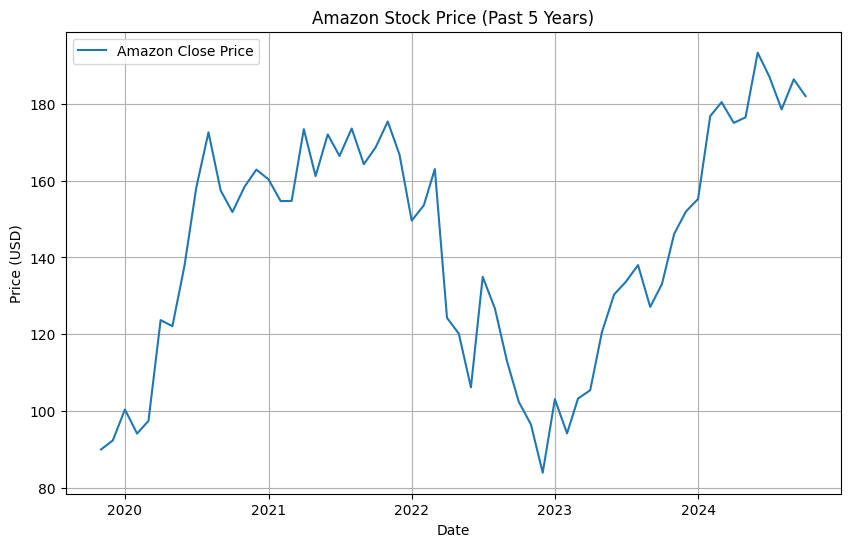

In [27]:
import yfinance as yf

# Retrieve the past 5 years of Amazon stock price data with an interval of 1 month.
ticker = 'AMZN' 
amazon_stock_data = yf.download(ticker, period='5y', interval='1mo')

# Select the 'Close' price for analysis
amazon_close_price = amazon_stock_data['Close']
print(amazon_close_price)

# Plot the stock price trend over the past 5 years
plt.figure(figsize=(10, 6))
plt.plot(amazon_close_price, label='Amazon Close Price')
plt.title('Amazon Stock Price (Past 5 Years)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

#### Plot the autocorrelation and partial autocorrelation with a lag of up to 24 months using the plot_acf() and plot_pacf() function

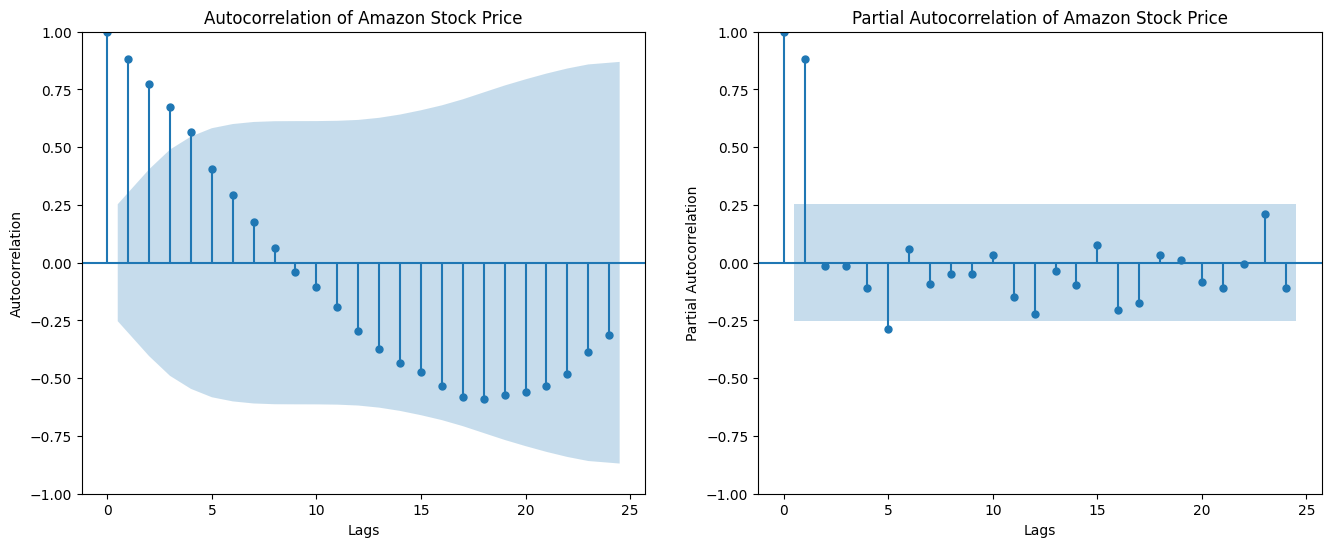

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Set up the figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the autocorrelation with a lag up to 24 months
plot_acf(amazon_close_price, lags=24, ax=ax1)
ax1.set_title('Autocorrelation of Amazon Stock Price')
ax1.set_xlabel('Lags')
ax1.set_ylabel('Autocorrelation')

# Plotting the partial autocorrelation with a lag up to 24 months
plot_pacf(amazon_close_price, lags=24, ax=ax2)
ax2.set_title('Partial Autocorrelation of Amazon Stock Price')
ax2.set_xlabel('Lags')
ax2.set_ylabel('Partial Autocorrelation')

#plt.tight_layout()
plt.show()


#### The above plots display the autocorrelation (left) and partial autocorrelation (right) for the Amazon stock price in the past 5 years with a lag of up to 24 months. The vertical line displays the autocorrelation or partial autocorrelation value. The shaded blue area represents the 95% confidence level. 

#### Autocorrelations that fall outside these intervals are considered statistically significant: “there is only a 5% chance that this correlation occurred by random chance”


#### Obervations:

**The autocorrelation plot (left one)**
- **Positive correlations at lower lags**: The first few lags (up to around lag 5) show strong to moderate positive correlation with statistical significance, indicating that the current stock price is correlated with its past 1 to 4 months price.
- **Decreasing trend and negative correlations at higher lags**: The autocorrelation gradually decreases and crosses zero after a few lags, indicating that the relationship weakens as time evolves. From lag 10 on, negative correlations appear, indicating some potential reversal in the stock price.

  
**The autocorrelation plot (right one)**
- **Significant PACF at lag 1**: A strong partial autocorrelation at lag 1 indicates that the first lag has the most substantial influence on the stock's next month price. This means that the stock price from one month ago is directly useful in predicting the current price. After the first lag, the PACF values are much smaller and mostly lie within the confidence interval, suggesting that beyond the first lag, there is little direct influence of past prices on future prices.

## Assignment questions (20 points)

### <span style="color:blue">[4 Points]</span> Question 1: among the five factors (Teaching, Research Environment, Research Quality, Industry Impact, International Outlook), identify which variable(s) have strong correlation with the Overall Score by computing the correlation matrix? Among the five factors, identify also a pair of variables that has weak correlation. Generate also the heatmap also corresponding to the correlation matrix.  

#### Question 1-1: compute the correlation matrix between Overall Score, Research Environment, Research Quality, Industry Impact, International Outlook 

In [29]:
# insert your code here

#### Question 1-2: generate the heatmap based on the correlation matrix

In [30]:
# insert your code here

#### Question 1-3: among the five factors (Teaching, Research Environment, Research Quality, Industry Impact, International Outlook), identify which variable(s) have strong correlation with the Overall Score. Explain why. 

Answer: 

#### Question 1-4: among the five factors, identify also a pair of variables that has weak correlation. Explain why.

Answer: 

### <span style="color:blue">[3 Points]</span> Question-2: Visualize the correlation between the following 3 pairs of variables using scatterplot with linear regression line:
### 1) Teaching (x-axis) and Research Environment (y-axis)
### 2) Research Environment (x-axis) and Industry Impact (y-axis)
### 3) International Outlook (x-axis) and Industry Impact (y-axis)

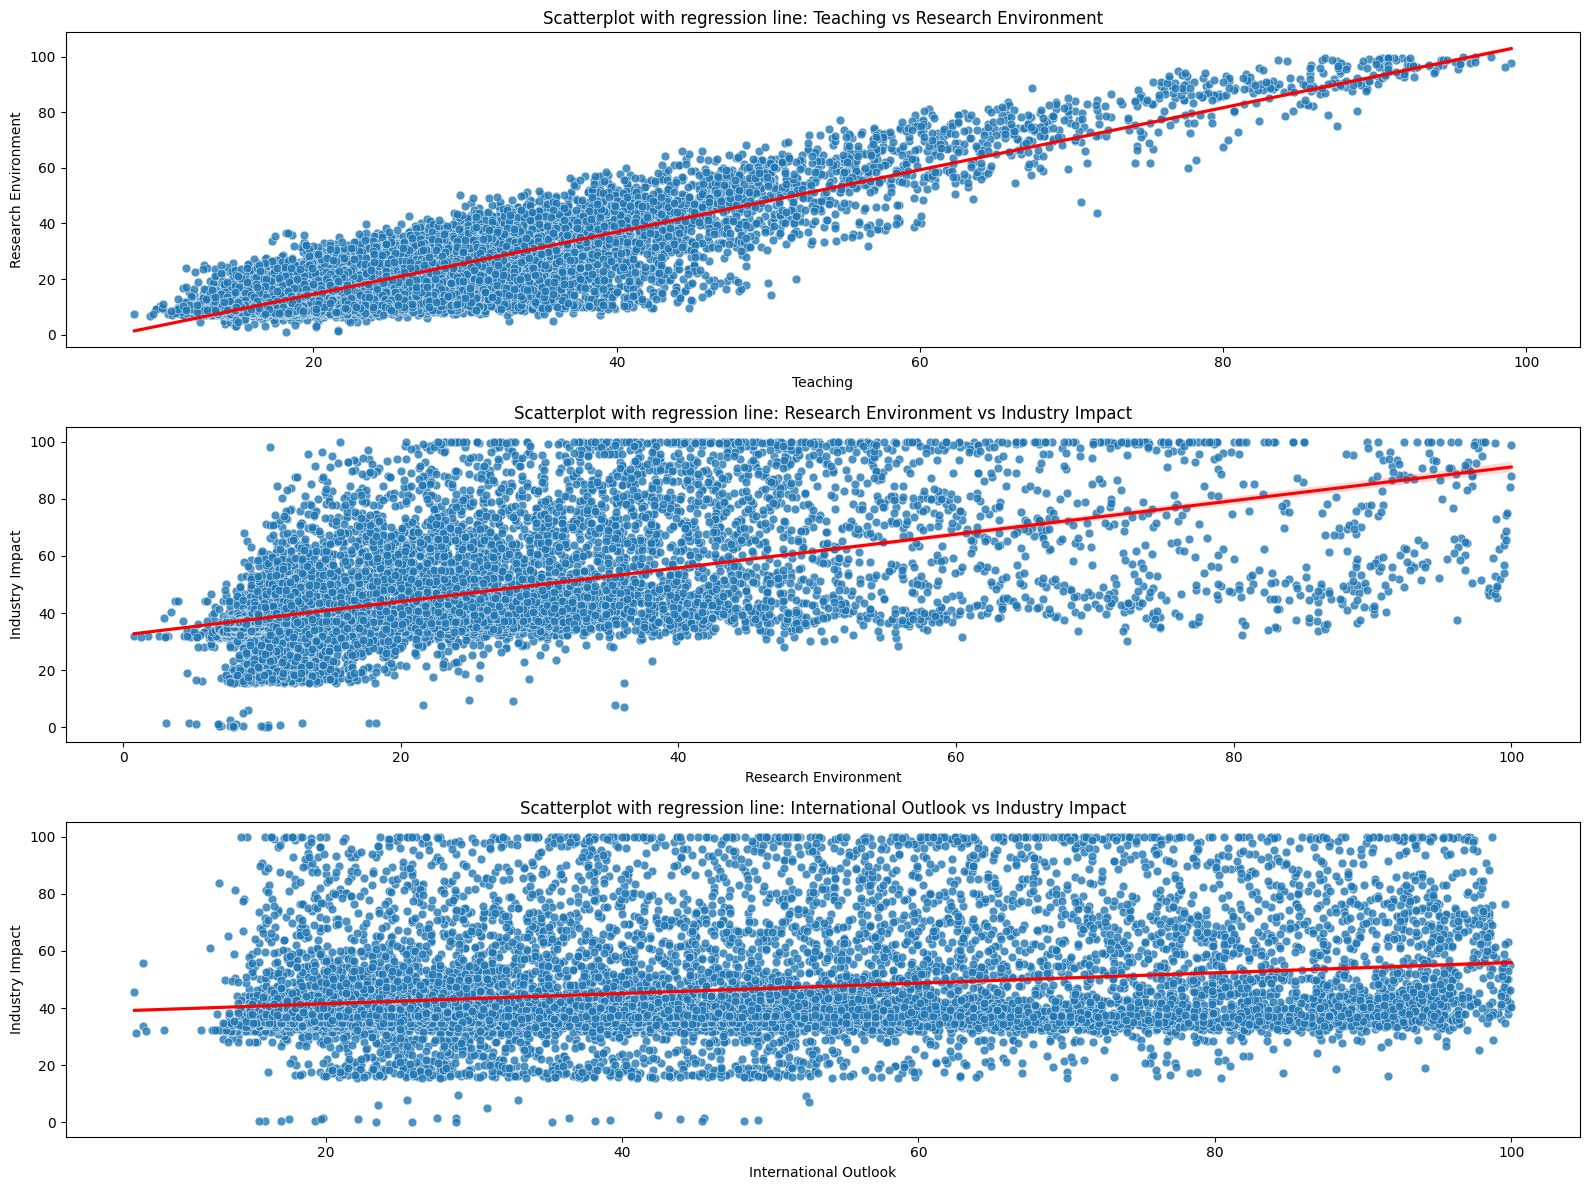

In [41]:
import seaborn as sns

# Task 1
plt.figure(figsize=(16, 12))
plt.subplot(3, 1, 1)
sns.regplot(x='Teaching', y='Research Environment', data=df, line_kws={'color':'red'}, scatter_kws={'s': 40, 'edgecolor': 'w', 'linewidths': 0.4})

plt.title('Teaching vs Research Environment')
plt.xlabel('Teaching')
plt.ylabel('Research Environment')

# Task 2
plt.subplot(3, 1, 2)
sns.regplot(x='Research Environment', y='Industry Impact', data=df, line_kws={'color': 'red'}, scatter_kws={'s': 40, 'edgecolor': 'w', 'linewidths': 0.4})
plt.title('Research Environment vs Industry Impact')
plt.xlabel('Research Environment')
plt.ylabel('Industry Impact')

# Task 3
plt.subplot(3, 1, 3)
sns.regplot(x='International Outlook', y='Industry Impact', data=df, line_kws={'color': 'red'}, scatter_kws={'s': 40, 'edgecolor': 'w', 'linewidths': 0.4})
plt.title('International Outlook vs Industry Impact')
plt.xlabel('International Outlook')
plt.ylabel('Industry Impact')

plt.tight_layout()
plt.show()

### <span style="color:blue">[5 Points]</span> Question-3: does the average research quality differ significantly for universities in US, France, Germany, Belgium, and Netherland. Compute the 95% confidence intervals for each of them, and visualize them in a figure. What's your observation?

#### Question 3-1: Add your code below

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

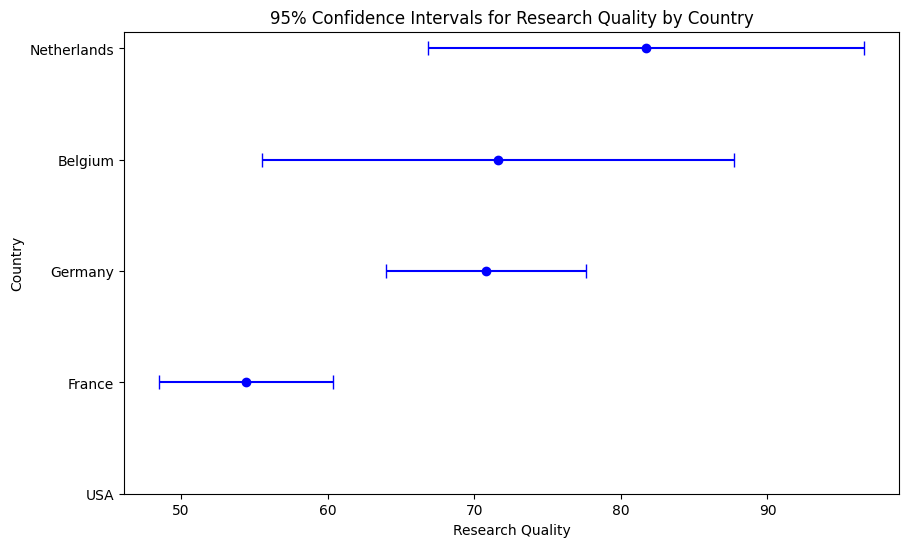

In [42]:
import numpy as np
import matplotlib.pyplot as plt

Z_VALUE = 1.96

confidence_intervals = []
means = []
country_names = ['USA', 'France', 'Germany', 'Belgium', 'Netherlands']

filtered_df = df[df['Country'].isin(country_names)]

for country in country_names:
    country_data = filtered_df[filtered_df['Country'] == country]['Research Quality']
    
    mean_quality = country_data.mean()
    std_quality = country_data.std(ddof=1)
    n = len(country_data)
    
    margin_of_error = Z_VALUE * (std_quality / np.sqrt(n))
    lower_bound = mean_quality - margin_of_error
    upper_bound = mean_quality + margin_of_error

    confidence_intervals.append((lower_bound, upper_bound))
    means.append(mean_quality)

plt.figure(figsize=(10, 6))

for index, (mean, (lower_bound, upper_bound)) in enumerate(zip(means, confidence_intervals)):
    plt.errorbar(x=mean, y=index, xerr=(upper_bound - lower_bound) / 2, fmt='o', color='b', capsize=5)

plt.yticks(range(len(country_names)), country_names)
plt.xlabel('Research Quality')
plt.ylabel('Country')
plt.title('95% Confidence Intervals for Research Quality by Country')

plt.grid(True)
plt.tight_layout()
plt.show()

#### Question 3-2: What is your observation based on the plot

Answer: After running this code, you will get a plot with error bars representing the 95% confidence intervals for each country. From this plot, you can observe if there is any significant difference in research quality between the countries based on whether the confidence intervals overlap or not.

### <span style="color:blue">[5 Points]</span> Question-4: Derive the python code to compute the autocorrelation based on the formula. And apply it to compute the autocorrelation for lag 1 to 6 for the following given time series.

$$
\large 
\rho_k = \frac{\sum_{t=1}^{n-k} (x_t - \bar{x})(x_{t+k} - \bar{x})}{\sum_{t=1}^{n} (x_t - \bar{x})^2}
$$

#### where 
#### - $\rho_k$ is the autocorrelation at lag $k$
#### - $x_t$ is the value of the time series at time $t$
#### - $x_{t+k}$ is the value of the time series at time $t+k$
#### - $\bar{x}$ is the mean of the time series
#### - $n$ is the total number of observations

#### The dataset contains the 30 days temperature in September

In [38]:
data = {
    'Date': pd.date_range(start='2024-09-01', periods=30, freq='D'),
    'Temperature': [15, 16, 14, 15, 17, 18, 19, 20, 18, 17, 16, 15, 15, 16, 18, 19, 20, 21, 19, 18, 17, 16, 15, 14, 15, 16, 17, 18, 19, 20]
}
temp_df = pd.DataFrame(data)

# Set the 'Date' as the index
temp_df.set_index('Date', inplace=True)

# Extract the temperature series
temperature = temp_df['Temperature']
temp_df

,Temperature
Date,
2024-09-01,15
2024-09-02,16
2024-09-03,14
2024-09-04,15
2024-09-05,17
2024-09-06,18
2024-09-07,19
2024-09-08,20
2024-09-09,18


#### Question 4-1: Derive the function to compute autocorrelation based on the formula. You can use either the template below, or derive your own template.

In [39]:
# function to compute the autocorrelation value for a given lag
def autocorrelation(time_series, lag):
    # insert your code to compute autocorrelation based on the formula here 
    return rho_k


for lag in range(1, 7):
    autocorr_value = autocorrelation(temperature, lag)
    print(f"Autocorrelation at lag {lag} is: {autocorr_value}")

NameError: name 'rho_k' is not defined

### <span style="color:blue">[3 Points]</span> Question 5: Use the plot_acf() function to visualize the autocorrelation among the 30 days temperature, with a lag of up to 10 days. And make the observation based on the plot.

#### Question 5-1: implement the code to visulize the autocorrelation

In [ ]:
# insert your code here

#### Question 5-2: What's your observation

Answer: 